In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dtypes = {'PassengerId':'category', 'Survived':'category', 'Pclass':'category'}
train_df = pd.read_csv('Titanic/train.csv', dtype=dtypes)
test_df = pd.read_csv('Titanic/test.csv')
combine = [train_df, test_df]


In [2]:
print('Features:', ', '.join(train_df.columns))

Features: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null category
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 73.2+ KB


In [5]:
numeric = train_df[['Age', 'Fare', 'Parch', 'SibSp']]
numeric.describe()

,Age,Fare,Parch,SibSp
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,0.523008
std,14.526497,49.693429,0.806057,1.102743
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,0.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000


In [6]:
import numpy as np
categorical = train_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
categorical.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,99,0,3,"Fry, Mr. Richard",male,CA. 2343,G6,S
freq,1,549,491,1,577,7,4,644


In [7]:
pclass_plus_survival = train_df[['Pclass', 'Survived']].apply(pd.to_numeric)
pclass_plus_survival.corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


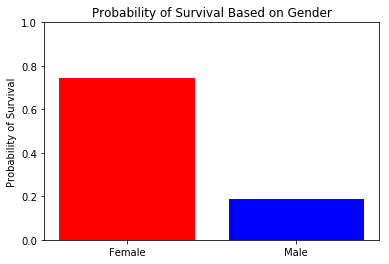

In [29]:
gender_plus_survival = train_df[['Sex', 'Survived']]
female_survival = pd.to_numeric(gender_plus_survival.loc[gender_plus_survival['Sex'] == 'female']['Survived'])
male_survival = pd.to_numeric(gender_plus_survival.loc[gender_plus_survival['Sex'] == 'male']['Survived'])
fig, ax = plt.subplots()
indices = np.arange(1,3)
female, male = plt.bar(indices, (female_survival.sum()/female_survival.count(), male_survival.sum()/male_survival.count()))
ax.set_xticks(indices)
female.set_facecolor('r')
male.set_facecolor('b')
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylim([0, 1])
ax.set_ylabel('Probability of Survival')
ax.set_title('Probability of Survival Based on Gender')


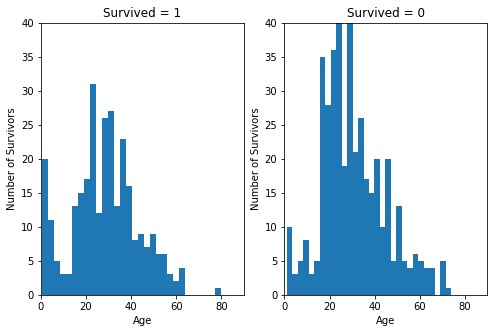

In [83]:
dead_df = train_df.loc[train_df['Survived'] == '0']
dead_df = dead_df[dead_df['Age'].notnull()]
alive_df = train_df.loc[train_df['Survived'] == '1']
alive_df = alive_df[alive_df['Age'].notnull()]
fig = plt.figure(num=1, figsize=(8,5))
ax = fig.add_subplot(121)
ax.hist(alive_df['Age'], bins=30)
ax2 = fig.add_subplot(122)
ax2.hist(dead_df['Age'], bins=30)

for i, axis in enumerate([ax2, ax]):
    axis.set_xlabel('Age')
    axis.set_ylabel('Number of Survivors')
    axis.set_ylim([0, 40])
    axis.set_xlim([0, 90])
    axis.set_title('Survived = %d' % (i,))

C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


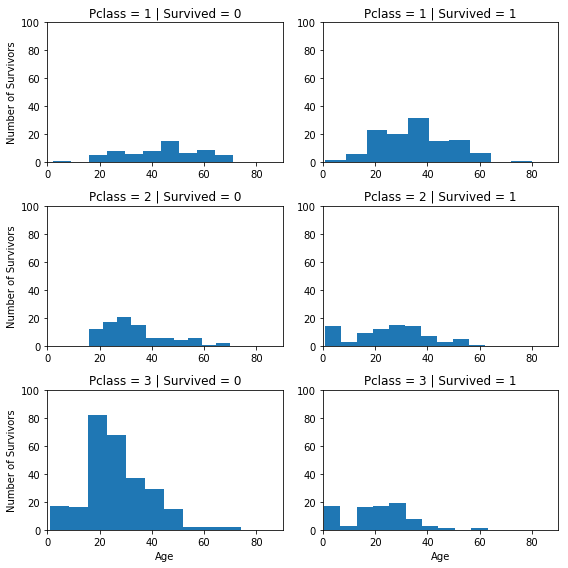

In [110]:
fig = plt.figure(num=2, figsize=(8, 8), tight_layout=True)
for i in range(6):
    pclass = (i+2)/2
    survived = i%2
    axis = fig.add_subplot(321 + i)
    if survived:
        axis.hist(alive_df.loc[alive_df['Pclass'] == str(int(pclass))]['Age'], bins=10)
    else:
        axis.hist(dead_df.loc[dead_df['Pclass'] == str(int(pclass))]['Age'], bins=10)
    if int(pclass)==3:
        axis.set_xlabel('Age')
    if not survived:
        axis.set_ylabel('Number of Survivors')
    axis.set_xlim([0,90])
    axis.set_ylim([0, 100])
    axis.set_title('Pclass = %d | Survived = %d' % (pclass, survived))

C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


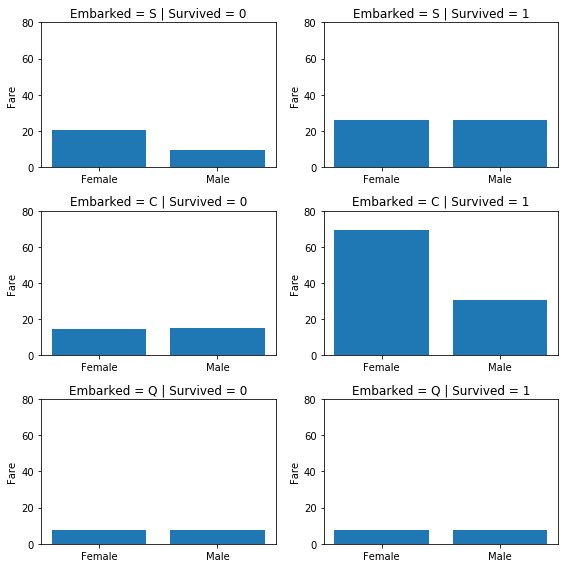

In [129]:
dead_df = train_df.loc[train_df['Survived'] == '0']
dead_df = dead_df[dead_df['Embarked'].notnull()]
alive_df = train_df.loc[train_df['Survived'] == '1']
alive_df = alive_df[alive_df['Embarked'].notnull()]

fig = plt.figure(num=2, figsize=(8, 8), tight_layout=True)
embarked = ['S', 'C', 'Q']
port_idx = 0
for i in range(6):
    port = embarked[port_idx]
    survived = i%2
    axis = fig.add_subplot(321 + i)
    if survived:
        males = alive_df.loc[(alive_df['Embarked'] == port) & (alive_df['Sex'] == 'male')]['Fare'].median()
        females = alive_df.loc[(alive_df['Embarked'] == port) & (alive_df['Sex'] == 'female')]['Fare'].median()
        axis.bar(indices, (females, males))
        port_idx += 1
    else:
        males = dead_df.loc[(dead_df['Embarked'] == port) & (dead_df['Sex'] == 'male')]['Fare'].median()
        females = dead_df.loc[(dead_df['Embarked'] == port) & (dead_df['Sex'] == 'female')]['Fare'].median()
        axis.bar(indices, (females, males))

    axis.set_xticks(indices)
    axis.set_xticklabels(['Female', 'Male'])
    axis.set_ylabel('Fare')
    axis.set_ylim([0, 80])
    axis.set_title('Embarked = %s | Survived = %d' % (port, survived))

In [133]:
tickets = train_df['Ticket']
print(tickets.nunique()/tickets.count())
print((tickets.count()-tickets.nunique())/2)

0.76430976431
105.0


In [137]:
print(train_df['Cabin'].count()/len(train_df))
print(len(train_df)+len(test_df)-train_df['Cabin'].count()-test_df['Cabin'].count())

0.228956228956
1014


In [149]:
# Q16 answer
train_df['Gender'] = pd.factorize(train_df['Sex'])[0]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [144]:
# Q17 answer
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Age'].count() == len(train_df)

True

In [156]:
print(train_df['Embarked'].mode()[0])
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Embarked'].count() == len(train_df)

S


True

In [158]:
test_df['Fare'].fillna(train_df['Fare'].mode()[0], inplace=True)
test_df['Fare'].count() == len(test_df)

True